# Double Pendelum

In [2]:

#] add OrdinaryDiffEqTsit5

In [6]:
#] add Printf

In [7]:
#] add Colors

In [7]:
using OrdinaryDiffEqTsit5
using Printf
using PyPlot
using Colors

In [8]:
"""

"""

function doublependulum!(dudt, u, p, t)
    # unpack variables and parameters
    theta1 = u[1]
    theta2 = u[2]
    dtheta1dt = u[3]
    dtheta2dt = u[4]
    κ, ν = p
    
    sn, cs = sincos(theta1 - theta2)
    a1 = κ*cs
    a2 = ν*cs
    γ = 1/(1.0 - a1*a2)
    
    f1 = -κ*sn*dtheta2dt^2 - sin(theta1)
    f2 =  ν*(sn*dtheta1dt^2 - ν*sin(theta2))

    dudt[1] = u[3]
    dudt[2] = u[4]
    dudt[3] = γ*(f1 - a1*f2)
    dudt[4] = γ*(f2 - a2*f1)
    
    return nothing
end


doublependulum! (generic function with 1 method)

In [9]:

l1 = 1.0  # length of pendulum1
l2 = 1.0  # length of pendulum2
m1 = 1.0  # mass of pendulum1
m2 = 1.0; # mass of pendulum2

In [10]:

tspan = (0.0, 50.0)
initial = [pi, pi/100, 0.0, 0.0];

In [11]:
ν = l1/l2
κ = 1 / ν * m2 / (m1 + m2)
# Pack the parameters
p = (κ, ν);

In [14]:

prob = ODEProblem(doublependulum!, initial, tspan, p);

In [19]:
sol = solve(prob, Tsit5(), abstol = 1e-7, reltol = 1e-7);

In [21]:

np = 2001
t = range(tspan[1], tspan[2], np)
sl = sol(t);

In [22]:

theta1 = sl[1, :]
theta2 = sl[2, :];

In [23]:

x1 =  l1 .* sin.(theta1)
y1 = -l1 .* cos.(theta1)
x2 = x1 .+ l2 .* sin.(theta2)
y2 = y1 .- l2 .* cos.(theta2);

In [24]:
"""
    snapshot_ft(nt, pts_disp, xl, xr, yb, yt, t, x1, y1, x2, y2)

Display the current positions (x1[nt], y1[nt]) and (x2[nt], y2(nt]), and 
the trajectories' fading tails - the most recent pts_disp points
"""
function snapshot_ft(nt, pts_disp, box, t, x1, y1, x2, y2)
    nt_start = max(1, nt-pts_disp)
    xl, xr, yb, yt = box
    axis("square")
    xlim(xl, xr)
    ylim(yb, yt)
    titl = @sprintf("Double pendulum t = %5.2f .. %5.2f",
                    t[nt_start], t[nt])
    title(titl, family="monospace")
    xlabel(L"$x$")
    ylabel(L"$y$")
    grid(true)

    # pivot
    plot(0.0, 0.0, color="black", marker="x", markersize=5.0)

    # two rods
    plot([0.0, x1[nt],x2[nt]], [0.0, y1[nt], y2[nt]], color="black")

    # mass 1
    c1 = "green"
    plot(x1[nt], y1[nt], color=c1, marker="o", markersize=5.0)
    
    # mass 2
    c2 = "blue"
    plot(x2[nt], y2[nt], color=c2, marker="o", markersize=5.0)

    # fading tail trajectory of mass 2
    c2p = parse(RGBA, c2)
    for i = nt_start:nt-1
        transp = 1.0 - ((nt-i-1)/(pts_disp-1))^2
        cc = (c2p.r, c2p.g, c2p.b, transp)
        plot([x2[i], x2[i+1]], [y2[i], y2[i+1]], color=cc, linewidth=0.5)
    end
    return nothing
end;

In [25]:


axis_lim = (l1 + l2)*1.2
xl = -axis_lim
xr = -xl
yb = -axis_lim
yt = -yb
box = (xl, xr, yb, yt);

In [30]:


# Define the length of the trajectory's tail
f = 0.99                      # Fraction of displayed points
pts_disp = round(Int, f*np)  # Number of displayed points

1981

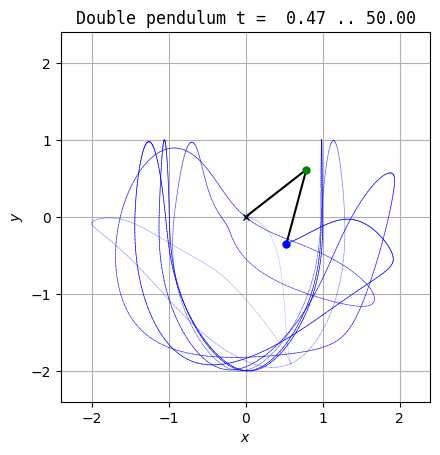

In [31]:

fig = figure()
for nt = 1:10:np
    snapshot_ft(nt, pts_disp, box, t, x1, y1, x2, y2)
    display(fig)
    IJulia.clear_output(true)
    clf()
end